In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# 1. Carregar o dataset
ds = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(ds)

# 2. Pré-processamento
df = df.dropna()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


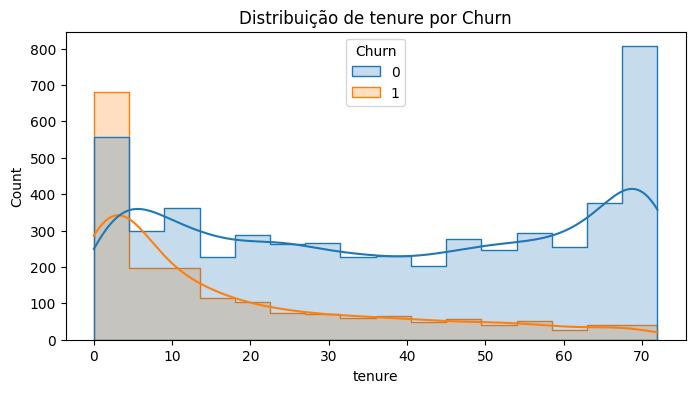

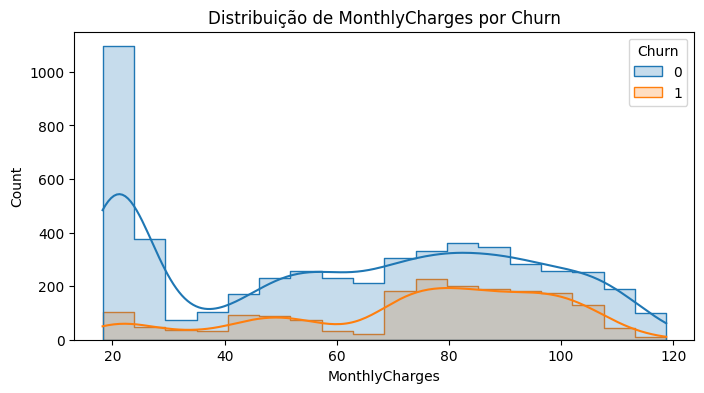

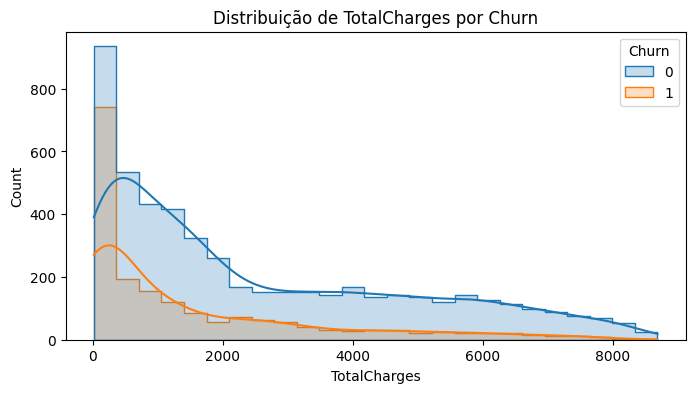

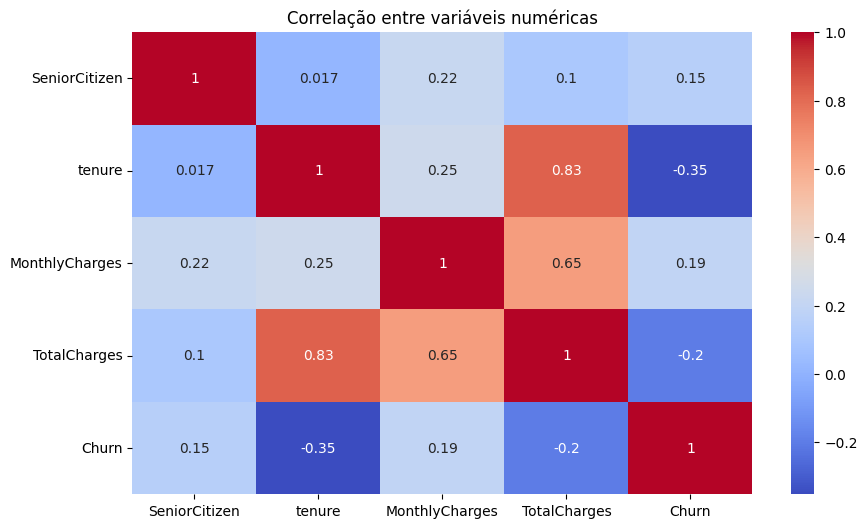

Número de outliers por variável (clientes que cancelaram):
tenure             0
MonthlyCharges     0
TotalCharges      27
dtype: int64


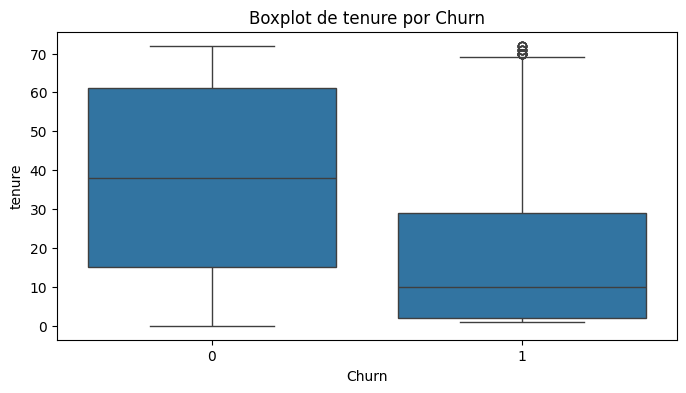

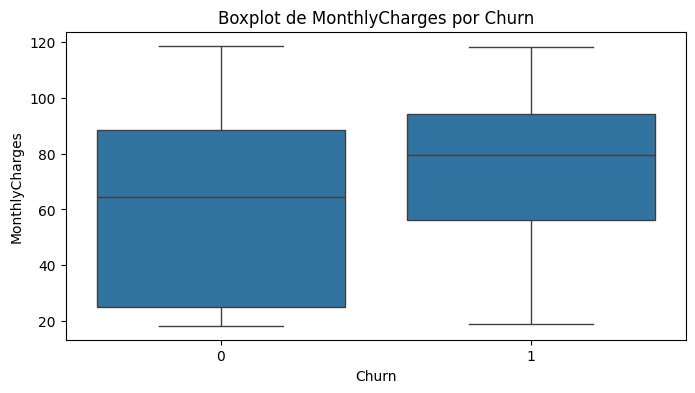

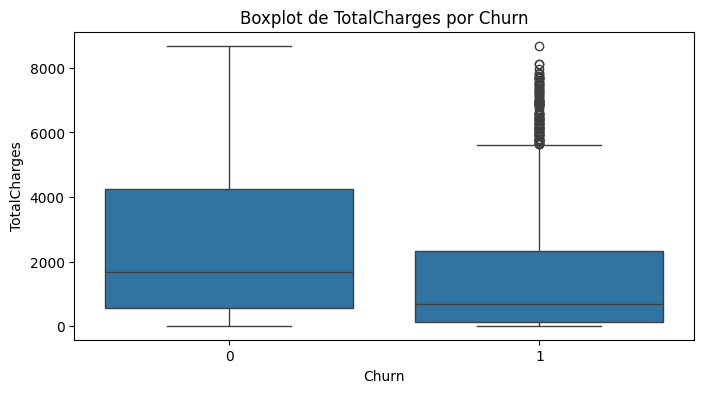

In [ ]:
# 3. Visualização de distribuição de variáveis numéricas
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue='Churn', kde=True, element='step')
    plt.title(f'Distribuição de {col} por Churn')
    plt.show()



# 4. Correlação com Churn
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlação entre variáveis numéricas')
plt.show()

# 5. Outliers em clientes que cancelaram

# Documentação
# https://en.wikipedia.org/wiki/Standard_score
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html

df_churned = df[df['Churn'] == 1]
z_scores = df_churned[num_cols].apply(zscore)
outliers = (z_scores.abs() > 3).sum()
print("Número de outliers por variável (clientes que cancelaram):")
print(outliers)


# 6. Boxplots para comparar com e sem churn
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'Boxplot de {col} por Churn')
    plt.show()


# Exemplos de Insights:
- Clientes com alto MonthlyCharges tendem a cancelar mais.

- Um aumento repentino em TotalCharges pode ser um indicador de churn.

- Boxplots e outliers mostram padrões extremos de consumo antes do cancelamento.